<h4 style="font-size:3rem; color:orange">Introducción al Machine Learning con el dataset del Titanic </h4>

<p>Este es un ejemplo sencillo de entrenamiento de un modelo para predecir resultados. Usamos una lista de supervivientes del Titanic, extraemos cuatro características
(sexo, clase del billete, sibsp-número de hermanos/pareja a bordo y parch-padres/hijos a bordo) y se aplican sobre la serie de datos test.csv, que no cuenta con el dato de si se sobrevivió o no, para hacer una predicción</p>

Train.csv contiene 891 registros y test.csv 418. El objetivo de esta práctica es predecir el resultado de esos 418.

In [1]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os
for dirname, _, filenames in os.walk('/data_ml'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#Los resultados que se escriben en el directorio actual 
# se guardan como salida


In [2]:
train_data = pd.read_csv('data_ml/train.csv')
train_data.head()
test_data = pd.read_csv('data_ml/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
women = train_data.loc[train_data.Sex == 'female']["Survived"].mean()*100
print(f"% de mujeres que sobrevivieron {women:.2f}%")


% de mujeres que sobrevivieron 74.20%


In [4]:
men = train_data.loc[train_data.Sex == 'male']["Survived"].mean()*100
print(f"% de hombres que sobrevivieron {men:.2f}%")



% de hombres que sobrevivieron 18.89%


In [14]:
y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
#No queremos entrenar el modelo con variables irrelevantes
#como el número de ticket o su id, de manera que se quitan.
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X,y)
predictions=model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv("data_ml/resultados.csv", index=False)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<p>Vamos a representar las predicciones generadas de manera gráfica.</p>

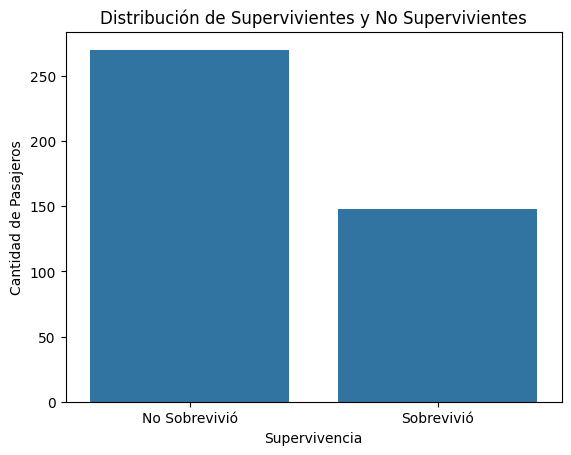

In [12]:
input_prediction_data=pd.read_csv("data_ml/resultados.csv")
sns.countplot(x='Survived', data=input_prediction_data)
plt.title('Distribución de Supervivientes y No Supervivientes')
plt.xlabel('Supervivencia')
plt.ylabel('Cantidad de Pasajeros')
plt.xticks([0, 1], ['No Sobrevivió', 'Sobrevivió'])
plt.show()

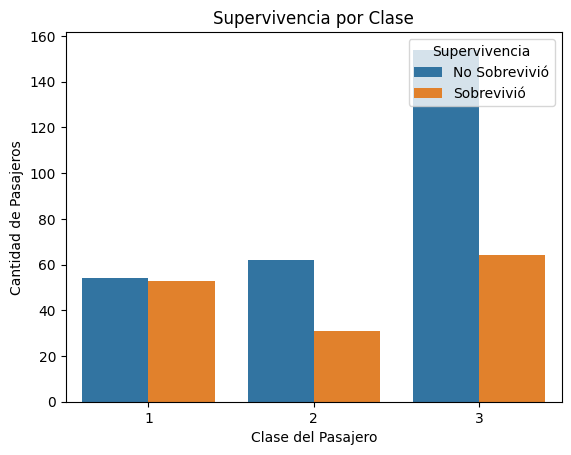

In [13]:
merged_data = test_data.copy()
merged_data['Survived'] = output['Survived']

# Supervivencia por clase
sns.countplot(x='Pclass', hue='Survived', data=merged_data)
plt.title('Supervivencia por Clase')
plt.xlabel('Clase del Pasajero')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Supervivencia', loc='upper right', labels=['No Sobrevivió', 'Sobrevivió'])
plt.show()

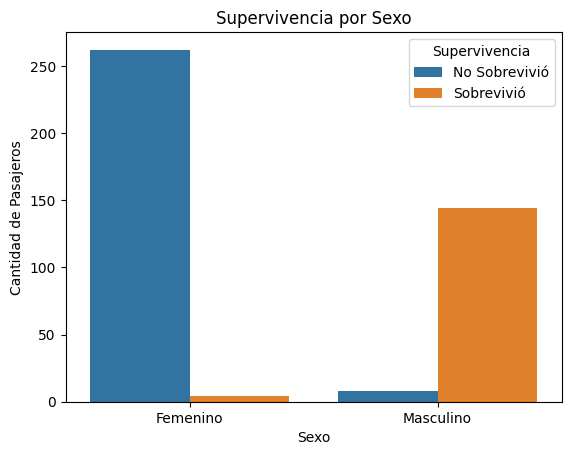

In [15]:
sns.countplot(x='Sex', hue='Survived', data=merged_data)
plt.title('Supervivencia por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Pasajeros')
plt.xticks([0, 1], ['Femenino', 'Masculino'])
plt.legend(title='Supervivencia', loc='upper right', labels=['No Sobrevivió', 'Sobrevivió'])
plt.show()
